# Lab1

Author:Adarsh Parsekar

# Task1

In [1]:
import warnings
warnings.filterwarnings('ignore')
from plotnine import ggplot, aes, geom_point,options, labs,scale_x_continuous, scale_y_continuous, scale_y_log10,annotate, theme_minimal, theme,scale_color_manual, scale_size,scale_fill_manual, scale_color_brewer, geom_vline, geom_text, scale_size_continuous
import pandas as pd
import matplotlib.pyplot as plt

df1 = pd.read_csv('q1data.csv')
df1

,income,life_exp,population,year,country,four_regions,six_regions,eight_regions,world_bank_region
0,1910.0,61.0,29200000.0,2010,Afghanistan,asia,south_asia,asia_west,South Asia
1,11100.0,78.1,2950000.0,2010,Albania,europe,europe_central_asia,europe_east,Europe & Central Asia
2,11100.0,74.7,36000000.0,2010,Algeria,africa,middle_east_north_africa,africa_north,Middle East & North Africa
3,46900.0,81.9,84500.0,2010,Andorra,europe,europe_central_asia,europe_west,Europe & Central Asia
4,7680.0,60.8,23400000.0,2010,Angola,africa,sub_saharan_africa,africa_sub_saharan,Sub-Saharan Africa
...,...,...,...,...,...,...,...,...,...
192,20400.0,75.4,28400000.0,2010,Venezuela,americas,america,america_south,Latin America & Caribbean
193,5350.0,73.3,88000000.0,2010,Vietnam,asia,east_asia_pacific,east_asia_pacific,East Asia & Pacific
194,4700.0,67.8,23200000.0,2010,Yemen,asia,middle_east_north_africa,asia_west,Middle East & North Africa
195,3200.0,57.5,13600000.0,2010,Zambia,africa,sub_saharan_africa,africa_sub_saharan,Sub-Saharan Africa


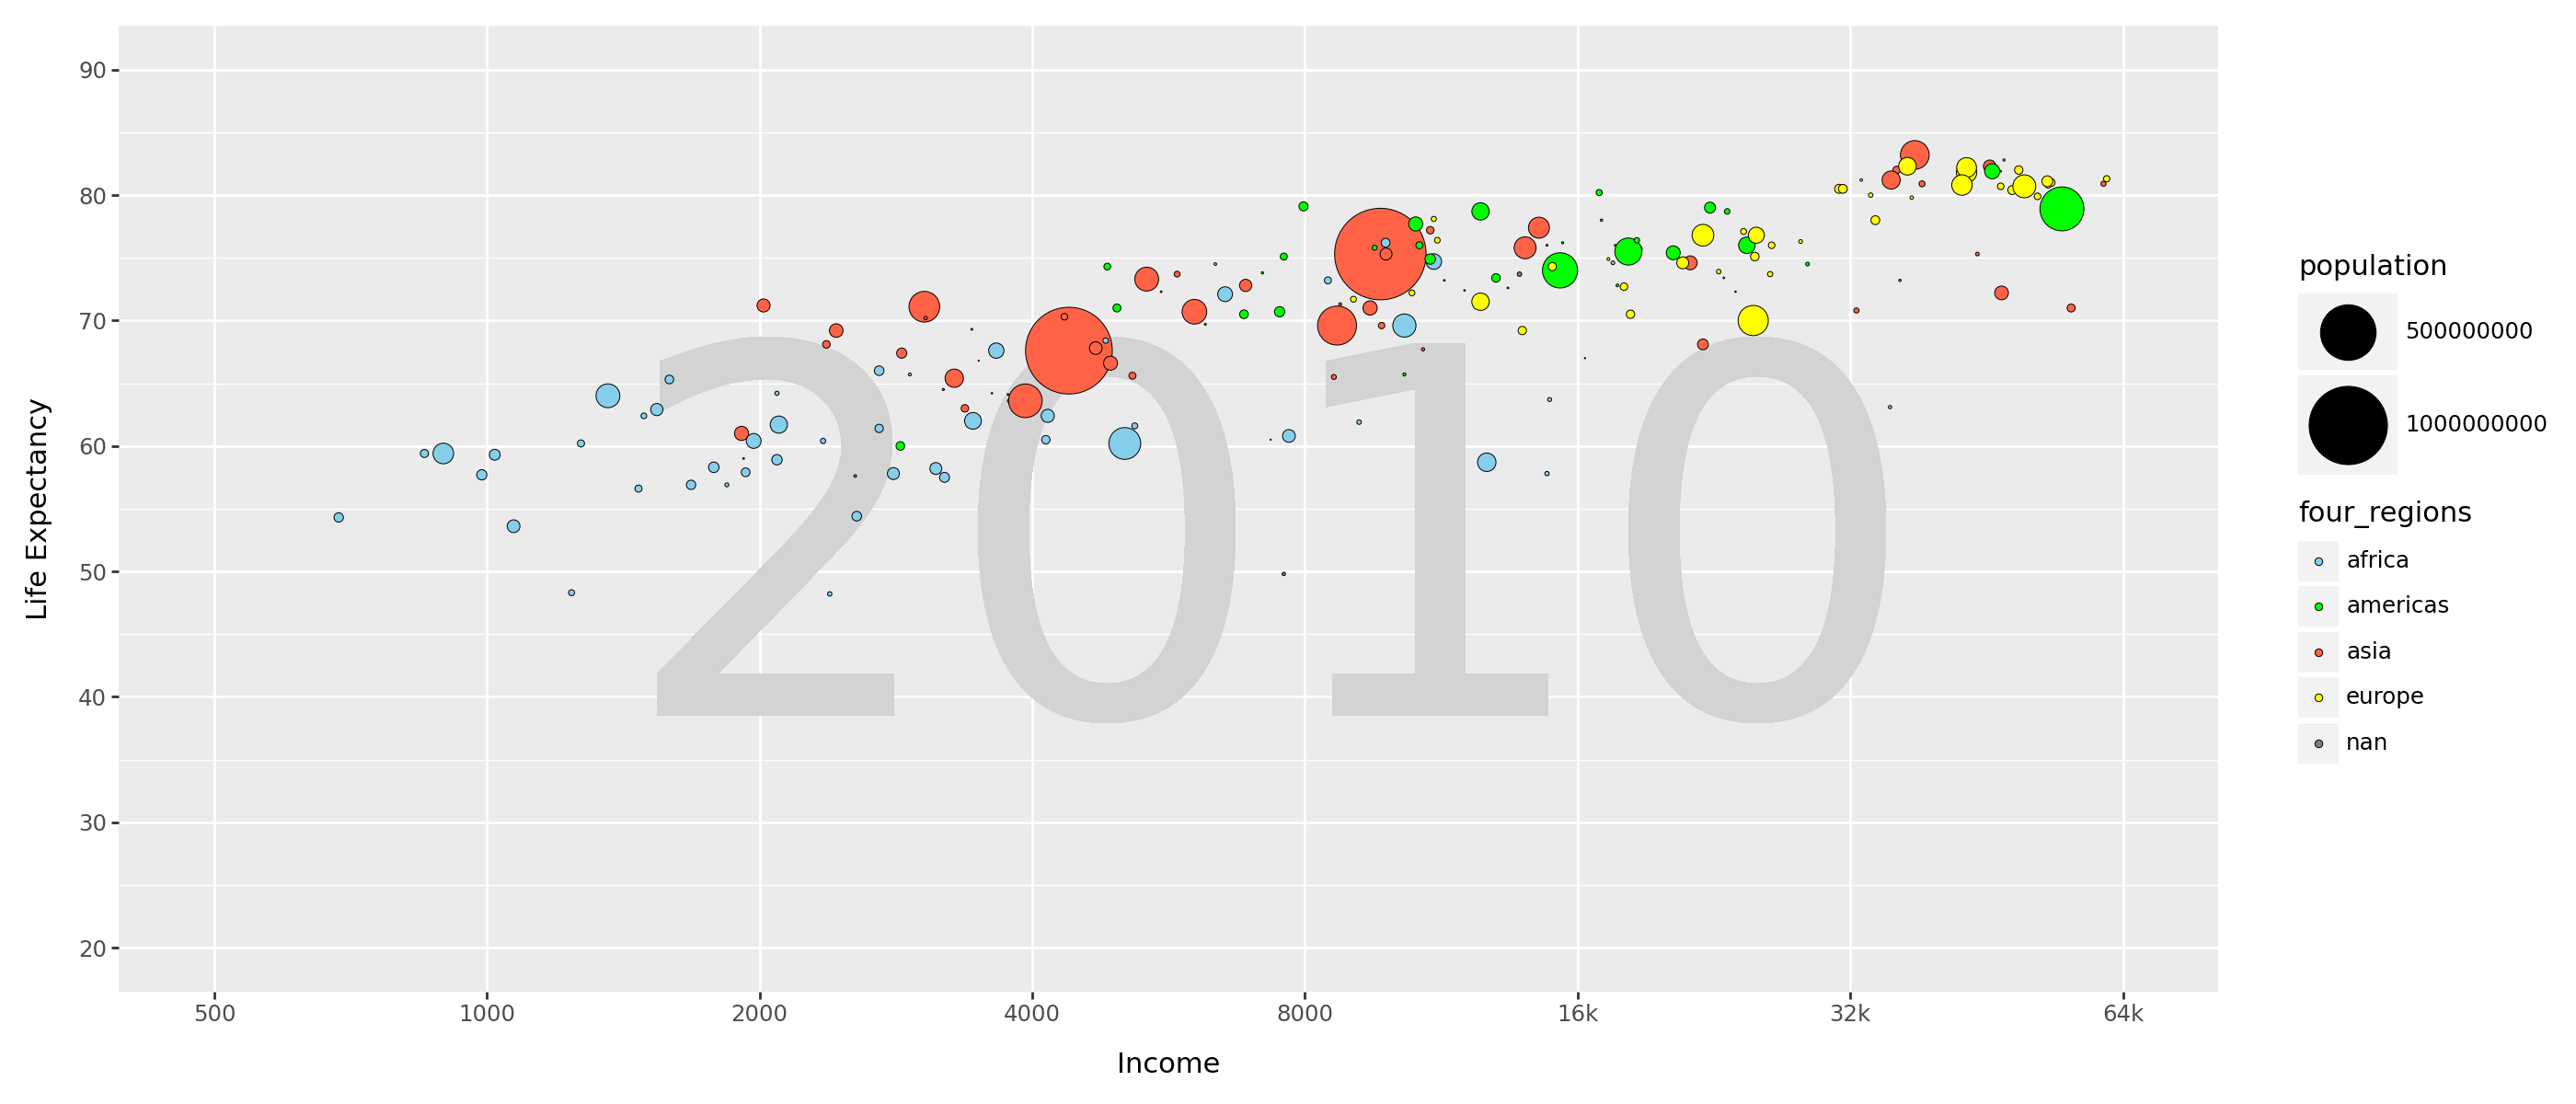

In [2]:
region_colors = {'africa':'skyblue', 'americas':'lime', 'asia':'tomato', 'europe':'yellow'}

(ggplot(df1, aes(x='income',
y='life_exp',
size='population',
fill='four_regions',
label='country'))+
geom_text(aes(x=1400, y = 30, label = "2010"), size = 200, color = "lightgrey", alpha = .1, ha='left', va="bottom") +
geom_point(color = "black", stroke = .2 )+
labs(x="Income", y="Life Expectancy")+
scale_x_continuous(limits = (500,64000),breaks=[500, 1000, 2000, 4000, 8000, 16000, 32000, 64000],trans='log2',labels=[500, 1000, 2000, 4000, 8000, '16k', '32k', '64k'])+
scale_y_continuous(limits=(20,90),breaks=range(20,91, 10))+
scale_size_continuous(range=(0, 20))+
theme(figure_size = (14,6)) +
scale_fill_manual(values=region_colors)
)

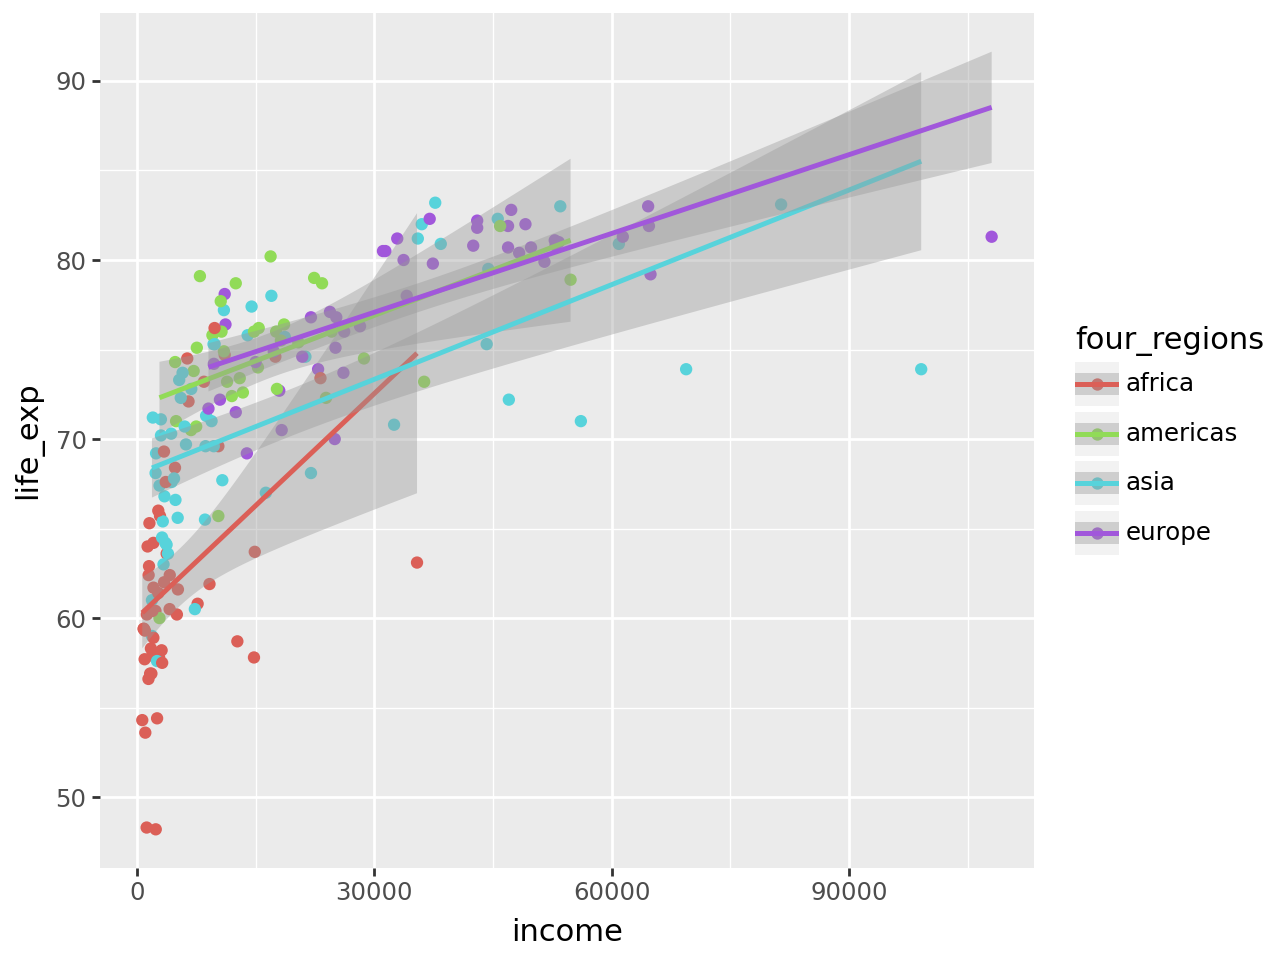

In [3]:
from plotnine import ggplot, aes, geom_point, geom_smooth
filtered_data = df1.dropna(subset=['income', 'life_exp','four_regions'])
plot = (ggplot(filtered_data, aes(x='income', y='life_exp', color='four_regions')) +
        geom_point() +
        geom_smooth(method='lm'))
print(plot)


Inference: Across all regions, there appears to be a positive relationship between income and life expectancy. As income increases, life expectancy also tends to increase. 

# Task2

In [4]:
df2 = pd.read_csv('q2data.csv')
df2

,imports,exports,energy,year,country,four_regions,six_regions,eight_regions,world_bank_region
0,NaN,NaN,NaN,1997,Afghanistan,asia,south_asia,asia_west,South Asia
1,36.7,11.5,427,1997,Albania,europe,europe_central_asia,europe_east,Europe & Central Asia
2,22.5,22.6,825,1997,Algeria,africa,middle_east_north_africa,africa_north,Middle East & North Africa
3,NaN,NaN,NaN,1997,American Samoa,NaN,NaN,NaN,NaN
4,NaN,NaN,434,1997,Angola,africa,sub_saharan_africa,africa_sub_saharan,Sub-Saharan Africa
...,...,...,...,...,...,...,...,...,...
201,52.2,44.8,340,1997,Vietnam,asia,east_asia_pacific,east_asia_pacific,East Asia & Pacific
202,NaN,NaN,NaN,1997,Virgin Islands (U.S.),NaN,NaN,NaN,NaN
203,NaN,NaN,241,1997,Yemen,NaN,NaN,NaN,NaN
204,31.6,24.6,617,1997,Zambia,africa,sub_saharan_africa,africa_sub_saharan,Sub-Saharan Africa


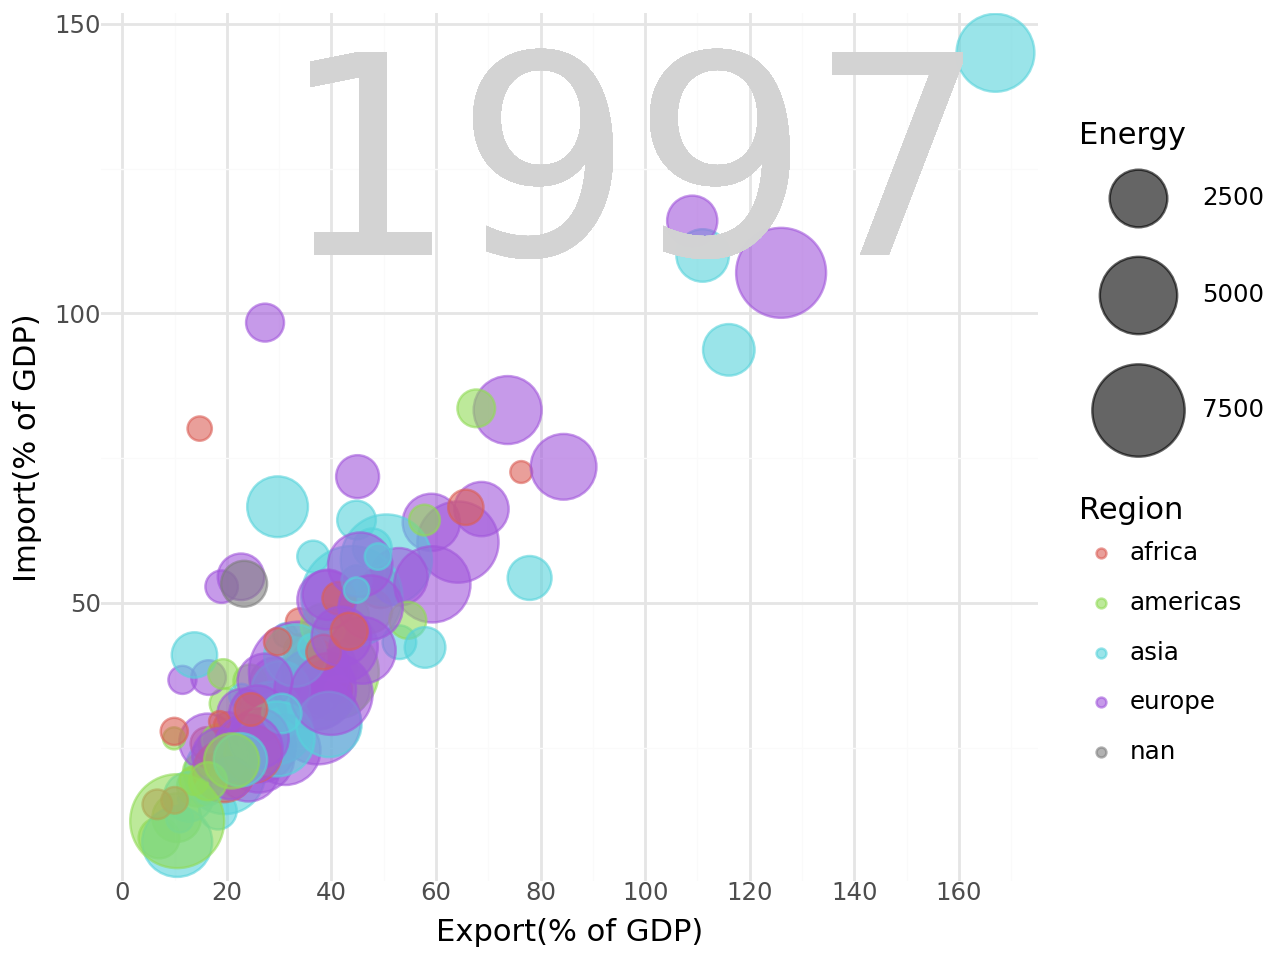

In [5]:
df2["energy"] = pd.to_numeric(df2["energy"], errors='coerce')
df2["exports"] = pd.to_numeric(df2["exports"], errors='coerce')
df2["imports"] = pd.to_numeric(df2["imports"], errors='coerce')

region_colors = {'africa':'skyblue', 'americas':'lime', 'asia':'tomato', 'europe':'yellow'}

df2_plot = (ggplot(df2, aes(x='exports', y='imports', size='energy', color='four_regions')) +
                  geom_point(alpha=0.6) +  
                  scale_size(range=(2, 20)) +  
                  scale_fill_manual(values=region_colors) + 
            geom_text(aes(x=30, y = 100, label = "1997"), size = 100, color = "lightgrey", alpha = .8, ha='left', va="bottom") +
                  labs(title="",  
                       x="Export(% of GDP)",  
                       y="Import(% of GDP)",  
                       size="Energy",  
                       color="Region") +   
                  theme_minimal()) 

options.figure_size = (12, 6)

plot=((df2_plot +
                  scale_x_continuous(breaks=range(0, 220 + 20, 20)) + 
                  scale_y_continuous(breaks=range(0, 400 + 50, 50))))
plot

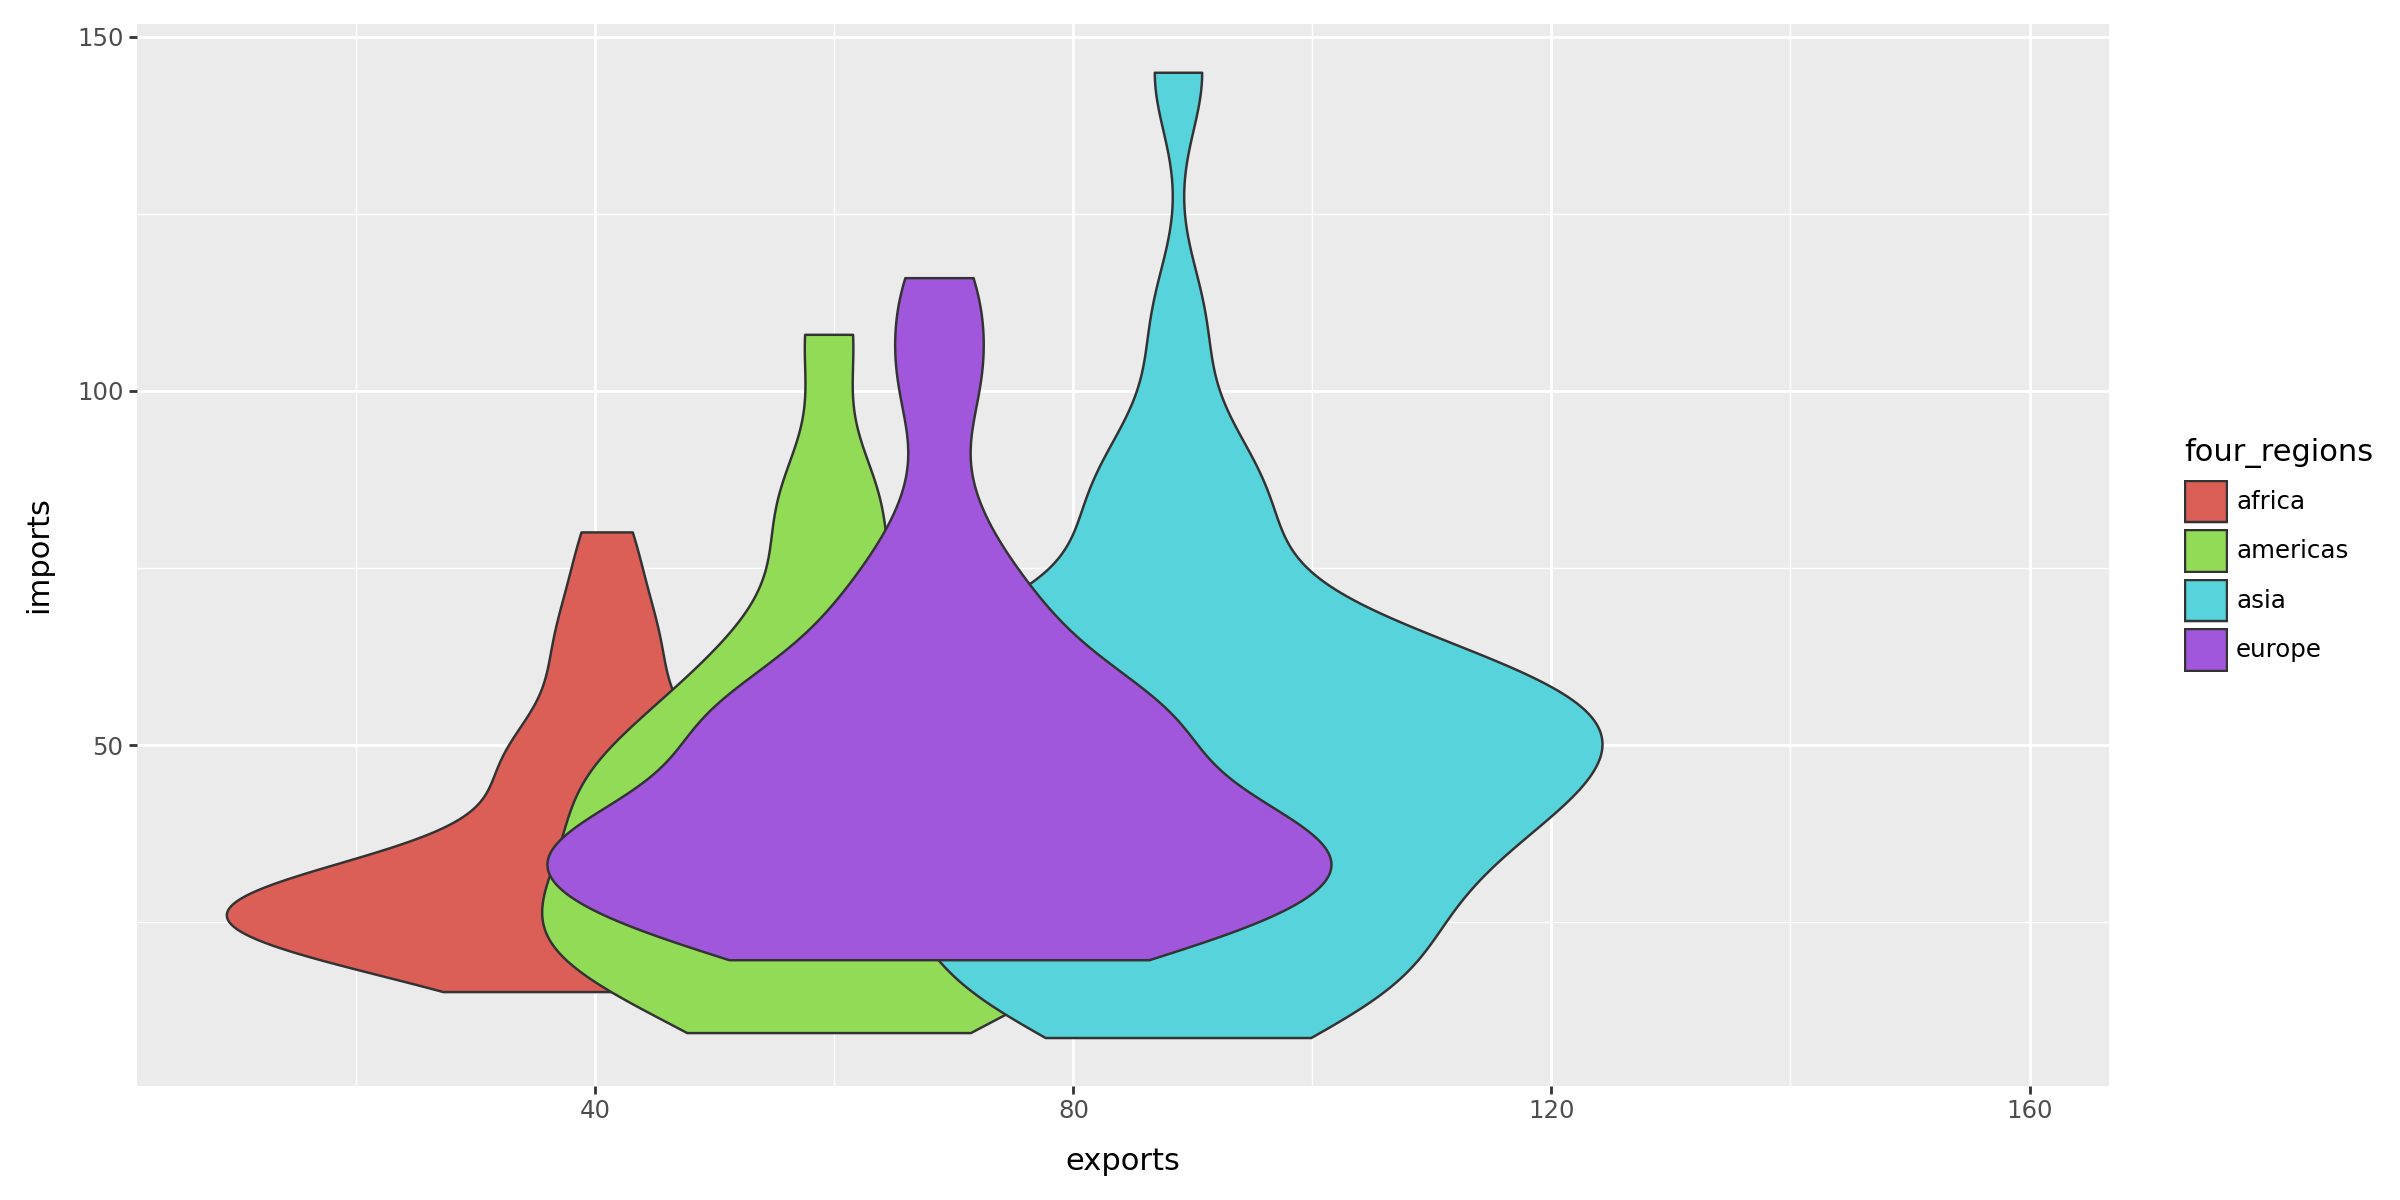

In [6]:
from plotnine import ggplot, aes, geom_violin
filtered_data = df2.dropna(subset=['exports', 'imports','four_regions'])
plot = (ggplot(filtered_data, aes(x='exports', y='imports', fill='four_regions')) +
        geom_violin())
print(plot)

inference: Europe and Asia show more variation in trade activities have larger spread of values, while Africa and the Americas have a more centralized distribution, with most countries falling within a narrower range for imports and exports.

# Task 3

In [8]:
df3 = pd.read_csv('q3data.csv')
df3

,internet_users,gdp,income,year,country,four_regions,six_regions,eight_regions,world_bank_region
0,0.00456,330.0,1190.0,2001,Afghanistan,asia,south_asia,asia_west,South Asia
1,0.39000,2570.0,6780.0,2001,Albania,europe,europe_central_asia,europe_east,Europe & Central Asia
2,1.59000,3770.0,9230.0,2001,Algeria,africa,middle_east_north_africa,africa_north,Middle East & North Africa
3,NaN,10500.0,NaN,2001,American Samoa,NaN,NaN,NaN,NaN
4,11.30000,42600.0,35600.0,2001,Andorra,europe,europe_central_asia,europe_west,Europe & Central Asia
...,...,...,...,...,...,...,...,...,...
210,1.85000,847.0,3270.0,2001,Vietnam,asia,east_asia_pacific,east_asia_pacific,East Asia & Pacific
211,27.50000,36700.0,NaN,2001,Virgin Islands (U.S.),NaN,NaN,NaN,NaN
212,0.51900,1190.0,4940.0,2001,Yemen,asia,middle_east_north_africa,asia_west,Middle East & North Africa
213,0.47800,991.0,2080.0,2001,Zambia,africa,sub_saharan_africa,africa_sub_saharan,Sub-Saharan Africa


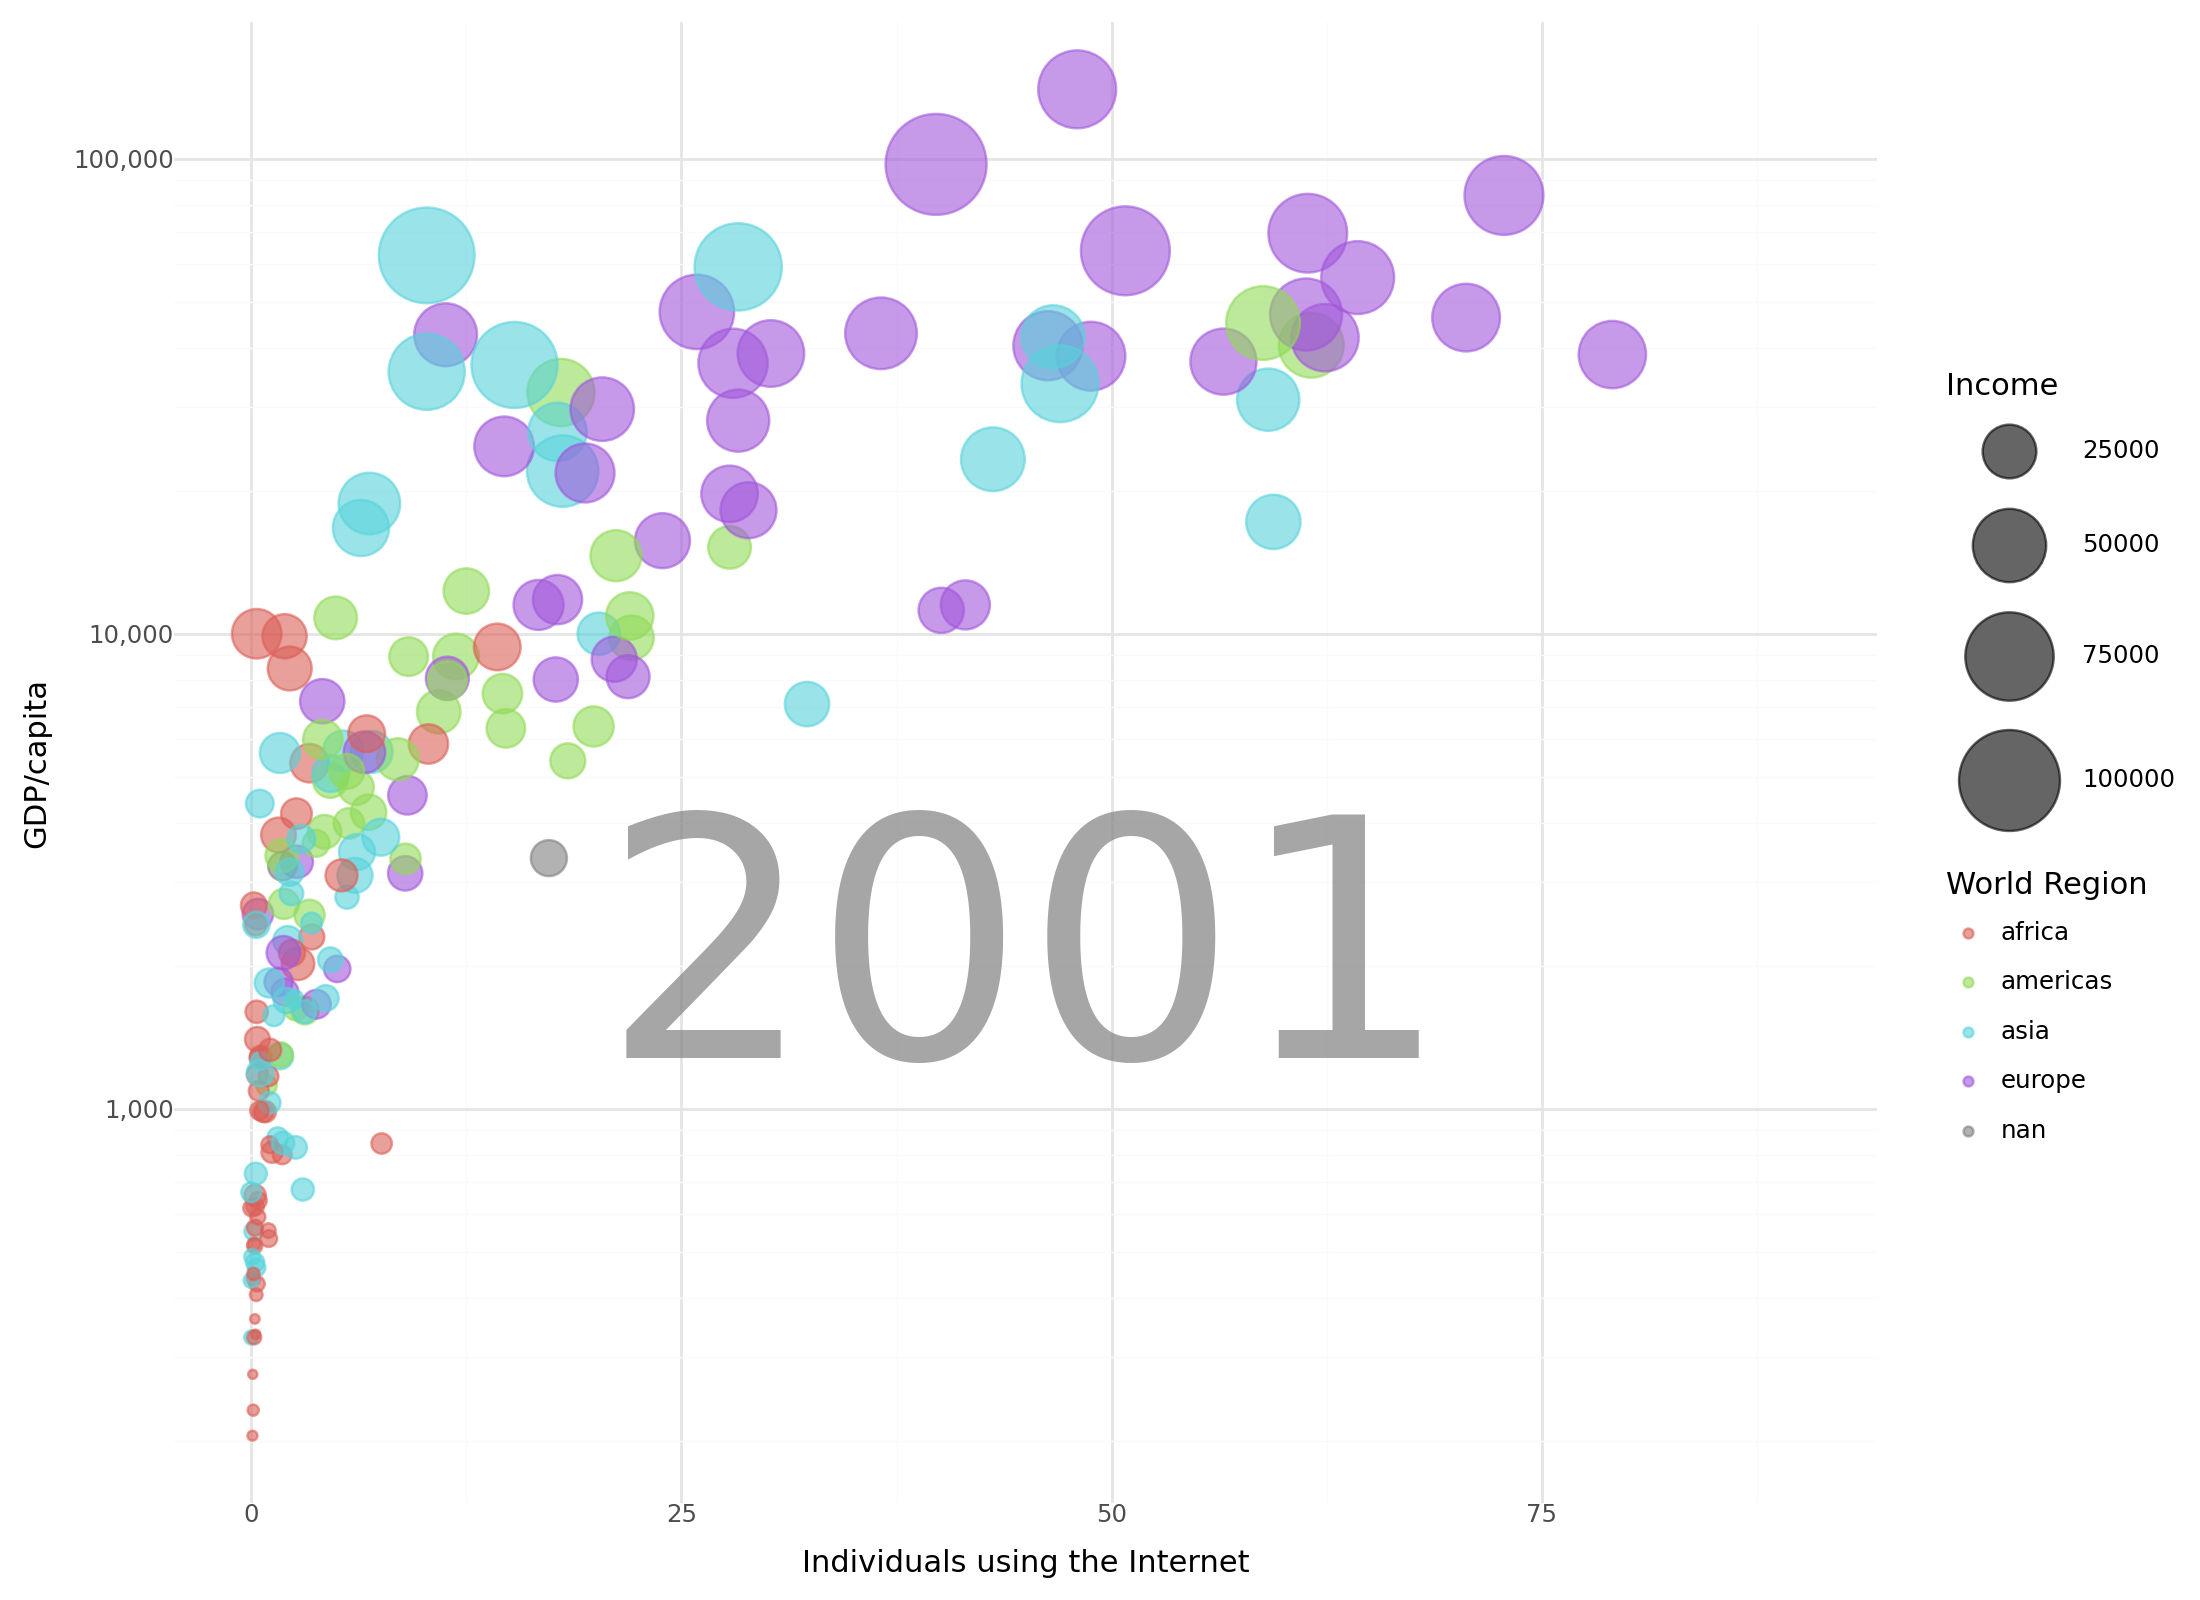

In [9]:
region_colors = {'africa':'skyblue', 'americas':'lime', 'asia':'tomato', 'europe':'yellow'}
df3_plot = (ggplot(df3, aes(x='internet_users', y='gdp', 
                         size='income', color='four_regions')) +
        geom_point(alpha=0.6) +  
        scale_size(range=(1, 20)) +  
        scale_fill_manual(values=region_colors) +
        scale_x_continuous(name='Individuals using the Internet', limits=(0, 90)) +
        scale_y_log10(name='GDP/capita', labels=lambda l: ['{:,}'.format(int(x)) for x in l]) +
        annotate('text', x=45, y=2000, label='2001', size=120, alpha=0.7, color='gray') +
        labs(size='Income', color='World Region') +
        
        # Use a minimal theme
        theme_minimal()+
        theme(figure_size=(11,8 ))
       )
df3_plot

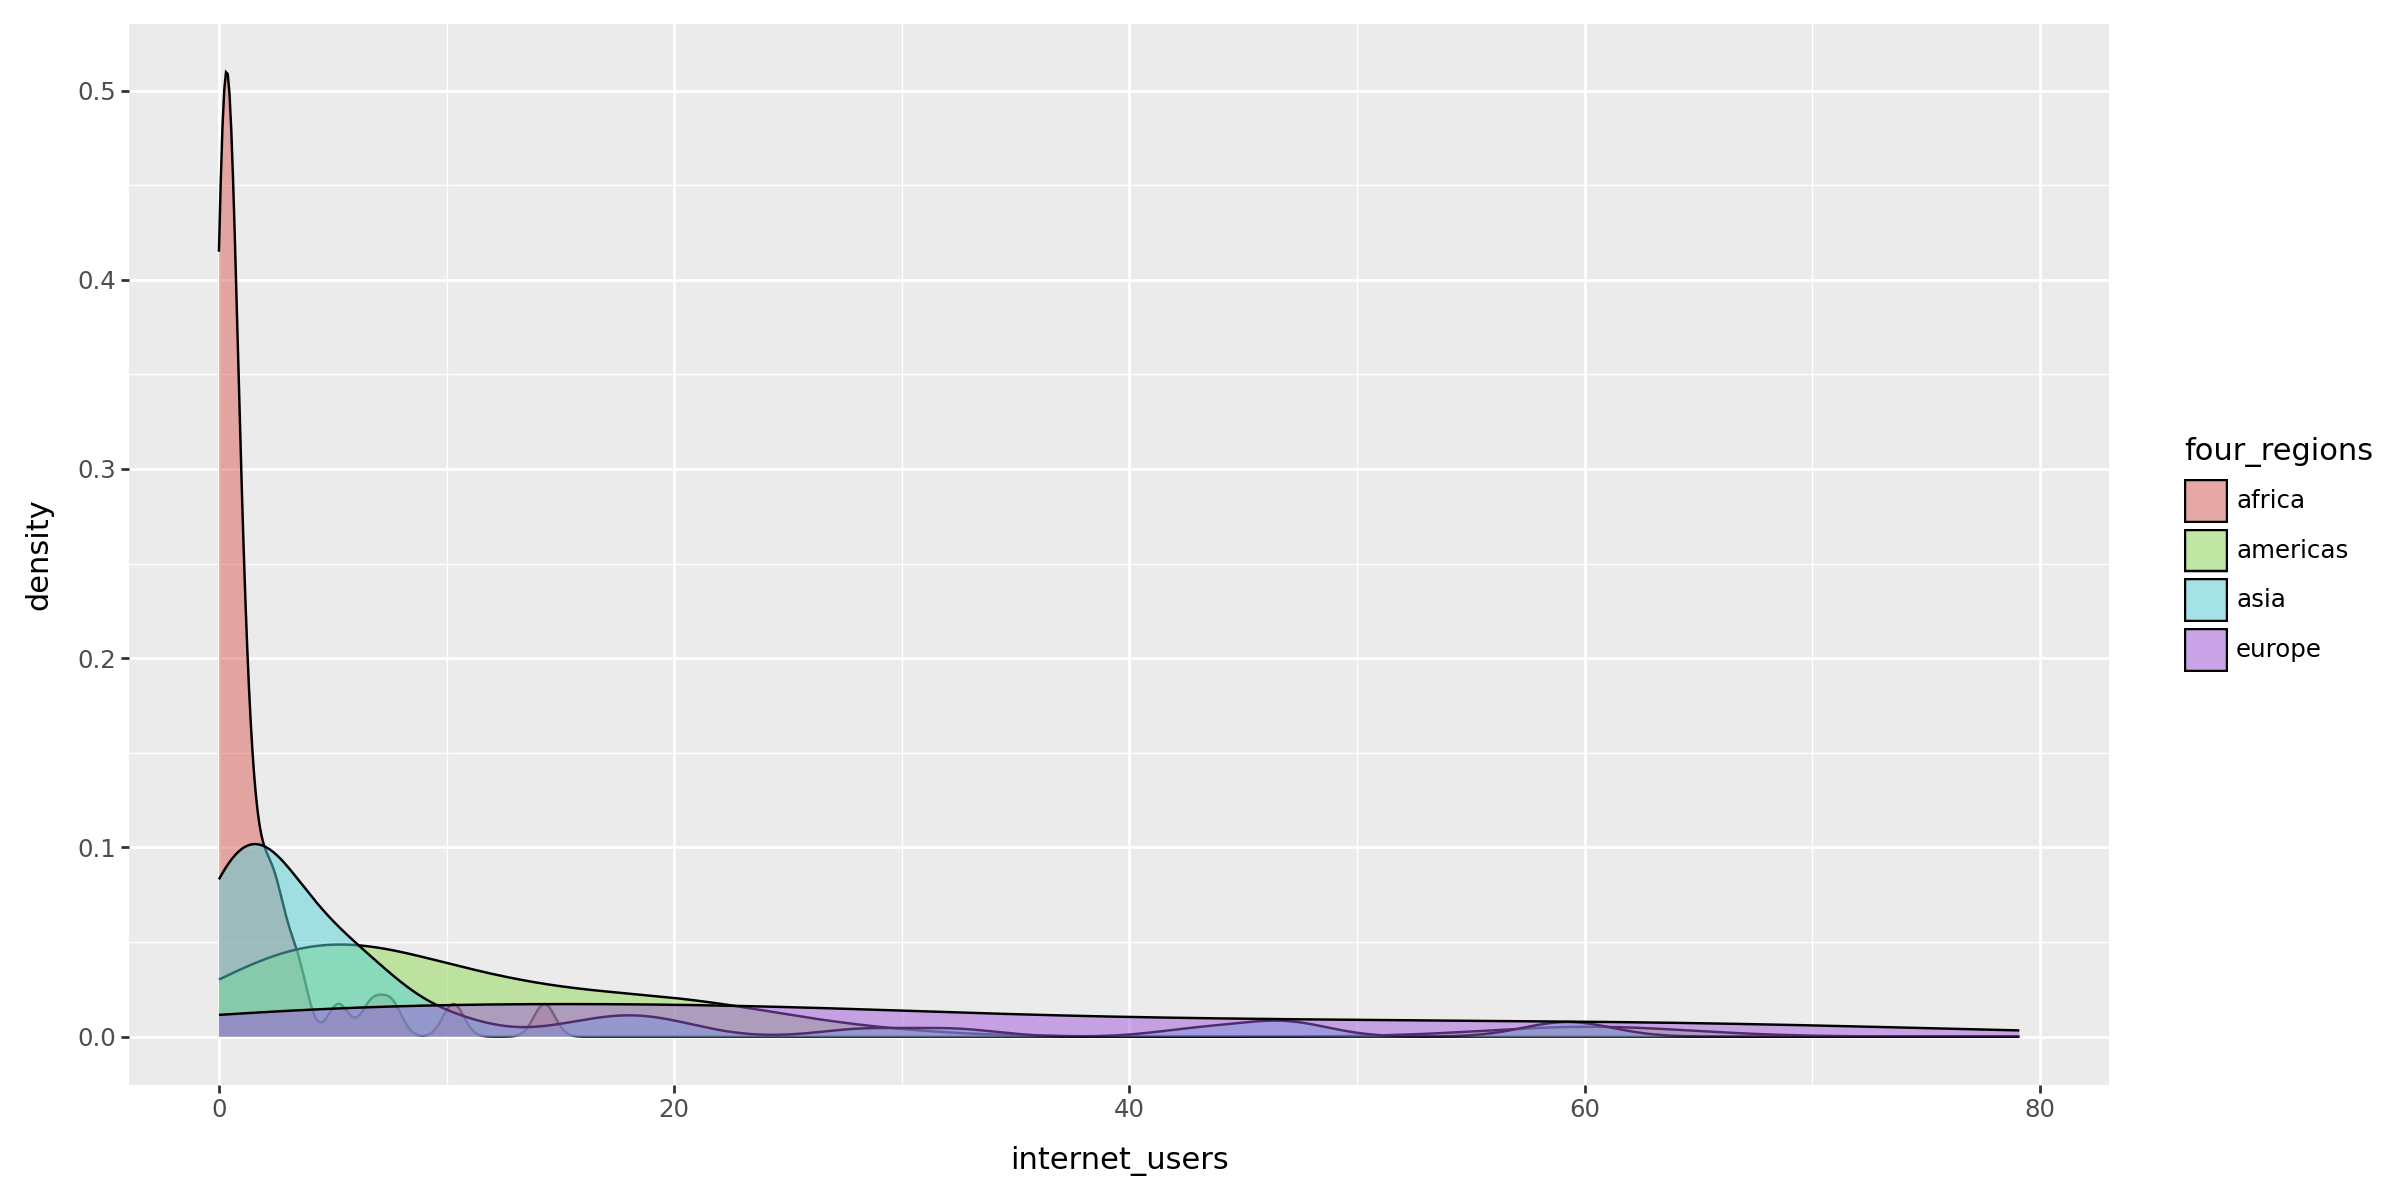

In [10]:
from plotnine import ggplot, aes, geom_density
filtered_data = df3.dropna(subset=['internet_users', 'gdp','four_regions'])
plot = (ggplot(filtered_data, aes(x='internet_users', fill='four_regions')) +
        geom_density(alpha=0.5))
print(plot)


Inference: African countries tend to have the lowest internet penetration, while Europe has a larger proportion of countries with higher internet usage. The Americas and Asia have moderate distributions but still show substantial variation.